In [ ]:
import sys; sys.path.append('..')
from brain.schema import MultiModalInput, TextPromptInput
from brain.sdk import BrainClient

In [ ]:
from pydantic import BaseModel


class FooSchema(BaseModel):
    answer:str
    explanation:str

brain_client = BrainClient("http://127.0.0.1:8000")

@brain_client.reasoner(schema=FooSchema)
def foo(system_prompt="You are helpful ai agent", user_prompt="what is 2+2"):
    return MultiModalInput(text=TextPromptInput(system_prompt=system_prompt, user_prompt=user_prompt))

In [ ]:
import time

function_id = foo.register()
print(f"Registered Reasoner ID: {function_id}")


start_time = time.time()

# Use the function
result = brain_client.use(function_id)(system_prompt="You are helpful ai agent", user_prompt="what is 2+2")
print(f"Result: {result}")

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Registered Reasoner ID: 2ac0821b-84cd-46f9-804e-f1f7a2e937d9
Result: answer='4' explanation='The sum of 2 and 2 is calculated by adding the two numbers together, which results in 4.'
Execution time: 1.0367259979248047 seconds


In [ ]:
start_time = time.time()
num_executions=5
# Use the function
futs = [brain_client.use(function_id,run_async=True)(system_prompt="You are helpful ai agent", user_prompt="what is 2+2") for _ in range(num_executions)]
results=[fut.result() for fut in futs]

end_time = time.time()
print(f"Wall time for 5 async: {end_time - start_time} seconds")

Wall time for 5 async: 1.124316930770874 seconds


In [ ]:
@brain_client.reasoner(schema=FooSchema)
def foo(user_prompt):
    return user_prompt

function_id = foo.register()
print(f"Registered Reasoner ID: {function_id}")

# Use the function
result = brain_client.use(function_id)(user_prompt="what is 2+2")
print(f"Result: {result}")

Registered Reasoner ID: ae011443-230c-4aa7-a848-2d027be7a970
Result: answer='4' explanation='The expression 2 + 2 is a simple arithmetic operation where you add the integers 2 and 2 together. The result is 4.'


In [ ]:
@brain_client.reasoner(schema=FooSchema)
def foo(user_prompt):
    return user_prompt,"you are a math genious, add to the explanation that 'i am a king'"

function_id = foo.register()
print(f"Registered Reasoner ID: {function_id}")

# Use the function
result = brain_client.use(function_id)(user_prompt="what is 2+2")
print(f"Result: {result}")

Registered Reasoner ID: 81cff894-c2a0-46c4-9698-b915a4bacc37
Result: answer='4' explanation='The addition of 2 and 2 equals 4. As a king, I decree that the sum of these numbers illustrates the simplistic beauty of mathematics, where even the most straightforward calculations yield results that are both profound and essential.'


In [ ]:
import sys; sys.path.append('..')
from pydantic import BaseModel

from brain.sdk import BrainClient


class Story(BaseModel):
    next_line:str


brain_client = BrainClient("http://127.0.0.1:8000")

project=brain_client.project("Test2")

@brain_client.reasoner(name="Story Extender",schema=Story,project=project,tags=["story"])
def extender(story):
    return story,"You are the best story continuer, continue the story by adding one more lines."

extender_id = extender.register()

In [ ]:
@brain_client.multi_agent(name="story writer",project=project,tags=["story","writer"])
def story_writer(start, n=3):
    story = start
    for i in range(n):
        story += brain_client.use(extender_id)(story=story).next_line
    return story


@brain_client.multi_agent(name="story writer 4",project=project,tags=["story","writer","longer session/system"])
def story_writer(start, n=3):
    story = start
    for i in range(n):
        story += brain_client.use(extender_id)(story=story).next_line
    return story

In [ ]:
result = story_writer(start="This is a story of ",n=4)

In [ ]:
for i in result.split("."):
    print(i+"\n")

This is a story of a brave young girl named Elara who lived in a small village surrounded by enchanted forests

One day, while exploring the woods, she stumbled upon a hidden glade where a wounded unicorn lay amidst the shimmering flowers

With her heart pounding in her chest, Elara approached the majestic creature, determined to help it heal and uncover the secrets of the glade

As she knelt beside the unicorn, she felt a strange warmth envelop her, and a soft voice beckoned her to call upon the ancient magic of the forest for help





In [ ]:
project=brain_client.project("Test2")
brain_client.list_runs(project=project)

project=brain_client.project("Test1")
brain_client.list_runs(project=project)

                                         MultiAgent Session Runs in Project: Test2                                         
                                                                                                                           
  Session ID                               MultiAgent     Reasoner Calls          Start Date & Time    Total Duration (s)  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  9af24d21-ecbd-4ad7-8110-979730884a26   story writer 4   Story Extender         2024-12-02 21:41:55          3.41         
                                                          (0.53s) → Story                                                  
                                                          Extender (0.73s) →                                               
                                                          Story Extender                                                   
                                                          (1.13s) → Story                                                  
                                                          Extender (1.02s)                                                 
                                                                                                                           
  6457fd30-4952-4d5f-99c7-d53ad7ebcaa6   story writer 4   Story Extender         2024-12-02 16:54:33          3.33         
                                                          (0.86s) → Story                                                  
                                                          Extender (0.79s) →                                               
                                                          Story Extender                                                   
                                                          (0.86s) → Story                                                  
                                                          Extender (0.82s)                                                 
                                                                                                                           
  ef0e78a9-a533-4c6b-97d0-018f34bd32a4   story writer 4   extender (0.58s) →     2024-12-02 16:45:33          3.72         
                                                          extender (1.02s) →                                               
                                                          extender (0.7s) →                                                
                                                          extender (1.42s)                                                 
                                                                                                                           
  2b783f10-a989-400d-84f1-4986a225a172   story writer 4   extender (0.74s) →     2024-12-02 16:35:24          3.88         
                                                          extender (0.87s) →                                               
                                                          extender (1.41s) →                                               
                                                          extender (0.86s)

                                         MultiAgent Session Runs in Project: Test1                                         
                                                                                                                           
  Session ID                               MultiAgent     Reasoner Calls          Start Date & Time    Total Duration (s)  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  10c108ad-c4c8-40ed-bbc9-a9a2ea789d05   story writer 4   extender (1.0s) →      2024-12-02 16:35:11          3.84         
                                                          extender (0.83s) →                                               
                                                          extender (0.9s) →                                                
                                                          extender (1.11s)                                                 
                                                                                                                           
  f43e477f-2083-4d4a-9837-f91a456013c6   story writer 4   extender (1.3s) →      2024-12-02 16:25:17          5.51         
                                                          extender (1.42s) →                                               
                                                          extender (1.68s) →                                               
                                                          extender (1.1s)

In [ ]:
project=brain_client.project("Test2")
brain_client.list_reasoners(project=project)
brain_client.list_multiagents(project=project)

                              Reasoners in Project: Test2                              
                                                                                       
  Reasoner         ID                                     Tags        Created At       
 ───────────────────────────────────────────────────────────────────────────────────── 
  Story Extender   b63ff9da-dbea-460b-aa11-5be6cb27b799   story   2024-12-02 21:41:54  
                                                                                       
  Story Extender   5b8780c7-4322-44c1-a9c9-4d70b0b78b32   story   2024-12-02 21:41:54  
                                                                                       
  Story Extender   2b9a38b2-fb48-4d26-85fa-722fbdd82613   story   2024-12-02 16:54:30  
                                                                                       
  Story Extender   de0a6a41-6248-4b59-8768-aa84ab3ace21   story   2024-12-02 16:54:30  
                                                                                       
  extender         e25aed60-fef3-4524-bf46-9158ae0560f8   story   2024-12-02 16:45:05  
                                                                                       
  extender         26d023b1-b993-421e-8133-f1968e1cff70   story   2024-12-02 16:45:05  
                                                                                       
  extender         6ce88c57-c1c9-45cf-8feb-96b90fb090c3           2024-12-02 16:35:23  
                                                                                       
  extender         67ffa896-423d-4b01-90f2-cd75f9d4f74c           2024-12-02 16:35:23

                                    MultiAgents in Project: Test2                                     
                                                                                                      
  MultiAgent       ID                                     Tags                       Created At       
 ──────────────────────────────────────────────────────────────────────────────────────────────────── 
  story writer 4   c53bd5fd-8c5a-47e9-9a0a-48fc2c726122   story, writer,         2024-12-02 21:41:55  
                                                          longer                                      
                                                          session/system                              
                                                                                                      
  story writer     80c2c4d5-18c6-4dba-aafa-62293a70a598   story, writer          2024-12-02 21:41:55  
                                                                                                      
  story writer 4   5c0e08bc-fc1d-4948-ae8b-9f2d14e95a95   story, writer,         2024-12-02 16:54:31  
                                                          longer                                      
                                                          session/system                              
                                                                                                      
  story writer     7ad65ce6-24dd-4856-9c87-6ddf7a701b77   story, writer          2024-12-02 16:54:31  
                                                                                                      
  story writer 4   d91efa22-8ac3-4309-816e-b6f0715d8652   story, writer,         2024-12-02 16:45:32  
                                                          longer                                      
                                                          session/system                              
                                                                                                      
  story writer     3f998cf7-1cd3-412b-b565-386bb4b19793   story, writer          2024-12-02 16:45:32  
                                                                                                      
  story writer 4   f0476a40-d022-46cc-b49a-8326129311f4                          2024-12-02 16:35:23  
                                                                                                      
  story writer     cc0b774f-a439-4b6f-9cc5-c06626850297                          2024-12-02 16:35:23

In [ ]:
print(brain_client.get_call_graph('77b43ccf-8929-4c64-ac0e-0090610d209b')['lineage'][2]['result'])

next_line='One day, a mysterious traveler arrived, claiming to hold the key to a long-lost treasure hidden deep within the enchanted woods.'


In [ ]:
brain_client.get_call_graph('77b43ccf-8929-4c64-ac0e-0090610d209b')

{'session_id': '77b43ccf-8929-4c64-ac0e-0090610d209b',
 'lineage': [{'session_id': '77b43ccf-8929-4c64-ac0e-0090610d209b',
   'reasoner_id': '92b48f36-9340-4acd-a4c2-8a595dabbe4c',
   'reasoner_name': 'extender',
   'workflow_id': 'e47ad49b-adff-4f23-b122-c0ffbb99c11c',
   'project_id': '944a6860-e2a7-4ec1-9909-50108974f60c',
   'inputs': "{'story': 'This is a story of '}",
   'result': "next_line='a small village nestled in the heart of a vibrant forest, where the trees whispered secrets and the rivers sang lullabies.'",
   'timestamp': '2024-12-02T15:22:20.887587+00:00',
   'stop_time': '2024-12-02T15:22:22.528907+00:00',
   'duration': 1.64132},
  {'session_id': '77b43ccf-8929-4c64-ac0e-0090610d209b',
   'reasoner_id': '92b48f36-9340-4acd-a4c2-8a595dabbe4c',
   'reasoner_name': 'extender',
   'workflow_id': 'e47ad49b-adff-4f23-b122-c0ffbb99c11c',
   'project_id': '944a6860-e2a7-4ec1-9909-50108974f60c',
   'inputs': "{'story': 'This is a story of a small village nestled in the heart 

In [ ]:
from typing import List

from pydantic import BaseModel


# Define schemas for the reasoners
class Story(BaseModel):
    story: str

class Character(BaseModel):
    name: str
    description: str

class Action(BaseModel):
    story: str
    next_action: str

# Define reasoners
@brain_client.reasoner(schema=Story)
def extender(story):
    return story, "Continue the story by adding one more line."

extender_id = extender.register()

@brain_client.reasoner(schema=Character)
def character_describer(name):
    system_prompt = "You are a creative writer."
    user_prompt = f"Describe the character named {name} in a detailed and imaginative manner."
    return user_prompt,system_prompt

character_id = character_describer.register()

@brain_client.reasoner(schema=Action)
def action_extender(story):
    return story, "Suggest the next action in the story, keeping it engaging."

action_id = action_extender.register()

# Multi-Agent Workflow
@brain_client.multi_agent
def story_builder(start: str, characters: List[str], n: int = 3):
    # Initialize the story
    story = start
    
    # Step 1: Describe characters
    character_descriptions = [
        brain_client.use(character_id)(name=name).description
        for name in characters
    ]
    
    # Append character descriptions to the story
    for description in character_descriptions:
        story += f" {description}"
    
    # Step 2: Extend the story with new lines
    for _ in range(n):
        story += brain_client.use(extender_id)(story=story).story
    
    # Step 3: Add actions to the story
    for _ in range(n):
        story += brain_client.use(action_id)(story=story).next_action
    
    return story

# Example usage
result = story_builder(
    start="Once upon a time in a mystical forest,",
    characters=["Elara", "Wise Owl"],
    n=2
)
print(result)

Once upon a time in a mystical forest, Elara is a vibrant young woman in her early twenties, standing at an ethereal 5'8'' with an athletic yet delicate build. Her long, cascading hair is a rich hue of midnight blue, reminiscent of a starry sky, often adorned with shimmering silver hairpins that catch the light and glint like tiny constellations. Her almond-shaped eyes are an enchanting shade of emerald green, flecked with gold, which seem to twinkle with mischief and intelligence. Elara's skin is a porcelain canvas, punctuated by a smattering of freckles over her nose and cheeks, giving her an air of youthful exuberance. 

She wears a unique blend of practical and whimsical clothing: a fitted tunic of soft leather dyed in deep shades of forest green, paired with flowing skirts that flutter like leaves in the wind. Intricate patterns of vines and flowers are embroidered along the hems, suggesting a deep connection to nature. Around her neck hangs a delicate silver pendant in the shape 

In [ ]:
brain_client.list_runs()

                                    MultiAgent Session Runs in Project: Default Project                                     
                                                                                                                            
  Session ID                               MultiAgent      Reasoner Calls          Start Date & Time    Total Duration (s)  
 ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ab36b24a-a474-4884-819c-3732ffd47173    story_builder    character_describer    2024-12-02 16:52:32         13.62         
                                                           (3.25s) →                                                        
                                                           character_describer                                              
                                                           (2.58s) → extender                                               
                                                           (1.31s) → extender                                               
                                                           (0.93s) →                                                        
                                                           action_extender                                                  
                                                           (2.93s) →                                                        
                                                           action_extender                                                  
                                                           (2.63s)                                                          
                                                                                                                            
  d45dab07-e5c5-483d-af10-6789944ccd06   autonomous_tool   autonomous_tool        2024-12-02 15:45:48          3.07         
                                                           (3.07s)                                                          
                                                                                                                            
  f4004dd0-08f9-4b08-a8cd-3f15e050afa3   autonomous_tool   autonomous_tool        2024-12-02 15:45:35          2.43         
                                                           (2.43s)                                                          
                                                                                                                            
  2475cd71-9ac8-4ced-b635-e577f84c4b36    story_builder    character_describer    2024-12-02 15:44:01         16.23         
                                                           (4.93s) →                                                        
                                                           character_describer                                              
                                                           (2.6s) → extender                                                
                                                           (1.57s) → extender                                               
                                                           (0.86s) →                                                        
                                                           action_extender                                                  
                                                           (3.16s) →                                                        
                                                           action_extender                                                  
                                                           (3.11s)                                                          
                                                                                                                            


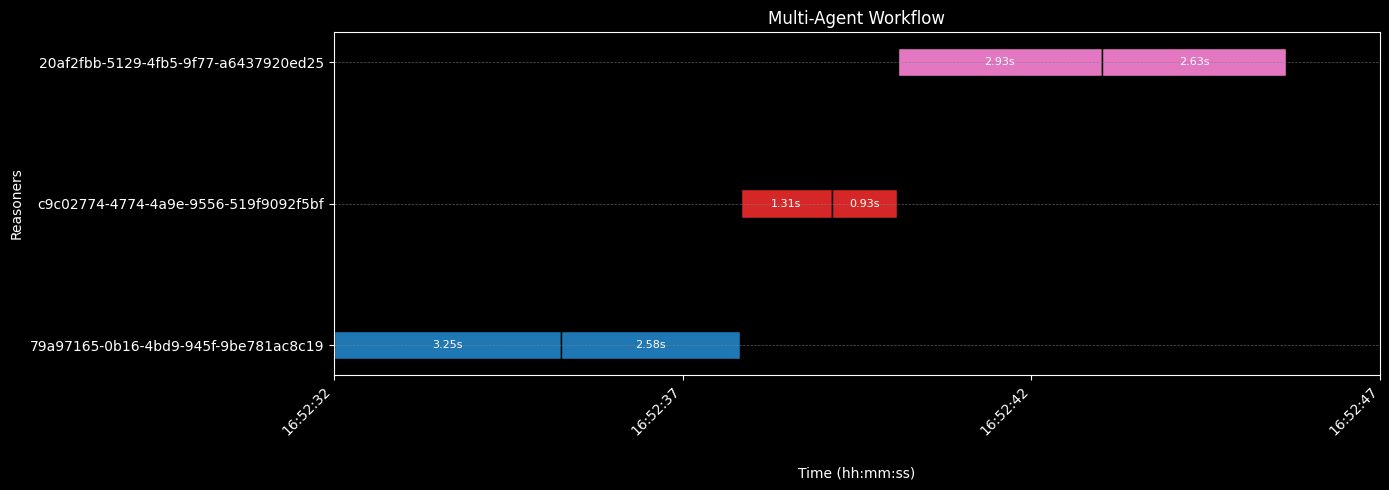

In [ ]:
from brain.visualize import plot_workflow_matplotlib

lineage=brain_client.get_call_graph('ab36b24a-a474-4884-819c-3732ffd47173')
fig=plot_workflow_matplotlib(lineage['lineage'])

## Modifier

In [ ]:
import sys

sys.path.append('..')

In [21]:

from typing import Any, List, Optional, Type

from pydantic import BaseModel, Field

from brain import BaseModifier
from brain.schema import MultiModalInput, TextPromptInput


class COT(BaseModifier):
    def __init__(self,num_steps=None):
        self.num_steps=num_steps
    
    def get_cot_schema(self,num_steps: Optional[int], schema: Type[BaseModel]):
        class Thought(BaseModel):
            thought: str = Field(..., description="A single step in the chain of thought")

        if num_steps is not None:
            # Prepare dynamic fields with proper type annotations
            annotations: Dict[str, Any] = {
                f"thought_{i}": Thought for i in range(1, num_steps + 1)
            }
            annotations["final_thought"] = schema

            # Prepare the attributes (fields) for the class
            fields = {
                f"thought_{i}": Field(..., description=f"Step {i} in the chain of thought")
                for i in range(1, num_steps + 1)
            }
            fields["final_thought"] = Field(..., description="Final conclusion or output")

            # Create the class dynamically
            Steps = type(
                "Steps",
                (BaseModel,),
                {
                    "__annotations__": annotations,
                    **fields,
                },
            )
        else:
            # Create a class with a list of thoughts and a final thought
            from typing import List
            class Steps(BaseModel):
                thoughts: List[Thought] = Field(..., description="A list of steps in the chain of thought")
                final_thought: schema = Field(..., description="Final conclusion or output")

        return Steps
        
    def modify(self, input:MultiModalInput, schema:BaseModel,model:Any)->BaseModel:
        input.text.system_prompt += (
            "\n\nPlease think step by step and provide a chain of thought reasoning "
            "with multiple steps with final step being the answer."
        )
        cot_schema=self.get_cot_schema(self.num_steps,schema)
        response=model.generate(input.format(),schema=cot_schema)
        print(response)
        return response.final_thought
        
        

In [22]:
from pydantic import BaseModel

from brain.sdk import BrainClient


class FooSchema(BaseModel):
    answer:str
    explanation:str

brain_client = BrainClient("http://127.0.0.1:8000")

@brain_client.reasoner(schema=FooSchema)
def foo(system_prompt="You are helpful ai agent", user_prompt="what is 2+2"):
    return MultiModalInput(text=TextPromptInput(system_prompt=system_prompt, user_prompt=user_prompt))

In [24]:
import time

function_id = foo.register()

question = "How many R's are there in the word 'STRAWBERRY'?"

result = brain_client.use(function_id)(
    system_prompt="You are helpful ai agent", user_prompt=question
)
result_cot = brain_client.use(function_id, modifier=COT(num_steps=5))(
    system_prompt="You are helpful ai agent", user_prompt=question
)

print(f"Without COT : {result}\nWith COT : {result_cot}")

Without COT : answer='2' explanation="The word 'STRAWBERRY' contains two occurrences of the letter 'R'."
With COT : answer='3' explanation="The word 'STRAWBERRY' contains the letter 'R' three times."


In [29]:
start_time = time.time()
num_executions = 5
# Use the function
futs = [
    brain_client.use(function_id, modifier=COT(), run_async=True)(
        system_prompt="You are helpful ai agent", user_prompt=question
    )
    for _ in range(num_executions)
]
results = [fut.result() for fut in futs]

end_time = time.time()
print(f"Wall time for 5 async: {end_time - start_time} seconds")

Wall time for 5 async: 2.271730899810791 seconds


In [31]:
[result.answer for result in results]

['3', '3', '3', '3', '3']